In [23]:
from lib.datasets import FilterAudioMNIST

dataset = FilterAudioMNIST(root_path='/root/data/AudioMNIST/data', include_rate=True, filter_fn=lambda x: x['accent'] == 'German')

(wavform, sample_rate), label = dataset[0]
wavform.shape, label, sample_rate

(torch.Size([1, 34845]), 0, 48000)

In [24]:
from torchaudio import transforms
from lib.wavUtils import Components, AudioPadding, display_spectro_gram
tf = Components(transforms=[
    AudioPadding(max_ms=1000, sample_rate=48000, random_shift=False),
    transforms.MelSpectrogram(sample_rate=48000, n_mels=80, n_fft=2048, win_length=800, hop_length=302, mel_scale='slaney'),
    transforms.AmplitudeToDB(top_db=80)
])
mel_sp = tf(wavform)
mel_sp.shape

torch.Size([1, 80, 159])

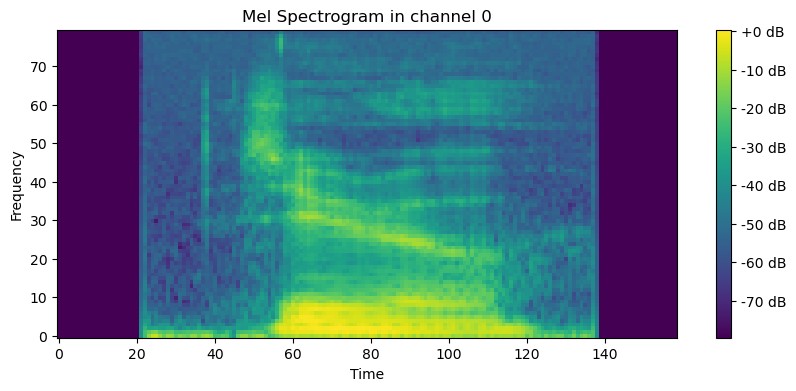

In [25]:
display_spectro_gram(waveform=mel_sp)